Step 1: Importing libraries

In this section, we import all the necessary libraries for the project. These libraries will allow us to perform various operations such as data manipulation, visualization, preprocessing, and building machine learning models.

In [16]:
# Import essential libraries
import pandas as pd  # For data manipulation and analysis
import numpy as np  # For numerical operations
import matplotlib.pyplot as plt  # For basic data visualizations
import seaborn as sns  # For advanced and styled visualizations

# Import libraries for machine learning
from sklearn.preprocessing import StandardScaler  # For feature scaling
from sklearn.model_selection import train_test_split  # For splitting the dataset
from sklearn.ensemble import RandomForestClassifier  # Random Forest model
from sklearn.metrics import classification_report, confusion_matrix  # For model evaluation
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report


Step 2: Load the dataset

In this step, we load the dataset containing information about diabetes diagnosis and related features. We'll preview the first few rows to understand the structure and verify that the data has been loaded correctly

In [10]:
data=pd.read_csv(r'C:\Users\marco\Documents\DSTI\ML with python\Project 2\TAIPEI_diabetes.csv') # Load the dataset
print(data.head())  # Display the first 5 rows of the dataset


   PatientID  Pregnancies  PlasmaGlucose  DiastolicBloodPressure  \
0    1354778            0            171                      80   
1    1147438            8             92                      93   
2    1640031            7            115                      47   
3    1883350            9            103                      78   
4    1424119            1             85                      59   

   TricepsThickness  SerumInsulin        BMI  DiabetesPedigree  Age  Diabetic  
0                34            23  43.509726          1.213191   21         0  
1                47            36  21.240576          0.158365   23         0  
2                52            35  41.511523          0.079019   23         0  
3                25           304  29.582192          1.282870   43         1  
4                27            35  42.604536          0.549542   22         0  


In [11]:
print(data.info())  # Display the summary of the dataset


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 10 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   PatientID               15000 non-null  int64  
 1   Pregnancies             15000 non-null  int64  
 2   PlasmaGlucose           15000 non-null  int64  
 3   DiastolicBloodPressure  15000 non-null  int64  
 4   TricepsThickness        15000 non-null  int64  
 5   SerumInsulin            15000 non-null  int64  
 6   BMI                     15000 non-null  float64
 7   DiabetesPedigree        15000 non-null  float64
 8   Age                     15000 non-null  int64  
 9   Diabetic                15000 non-null  int64  
dtypes: float64(2), int64(8)
memory usage: 1.1 MB
None


In [12]:
print(data.describe())  # Display the statistical summary of the dataset

          PatientID   Pregnancies  PlasmaGlucose  DiastolicBloodPressure  \
count  1.500000e+04  15000.000000   15000.000000            15000.000000   
mean   1.502922e+06      3.224533     107.856867               71.220667   
std    2.892534e+05      3.391020      31.981975               16.758716   
min    1.000038e+06      0.000000      44.000000               24.000000   
25%    1.252866e+06      0.000000      84.000000               58.000000   
50%    1.505508e+06      2.000000     104.000000               72.000000   
75%    1.755205e+06      6.000000     129.000000               85.000000   
max    1.999997e+06     14.000000     192.000000              117.000000   

       TricepsThickness  SerumInsulin           BMI  DiabetesPedigree  \
count      15000.000000  15000.000000  15000.000000      15000.000000   
mean          28.814000    137.852133     31.509646          0.398968   
std           14.555716    133.068252      9.759000          0.377944   
min            7.000000

Step 3 : 

(EDA) exploratory data analysis

Missing values per column:
PatientID                 0
Pregnancies               0
PlasmaGlucose             0
DiastolicBloodPressure    0
TricepsThickness          0
SerumInsulin              0
BMI                       0
DiabetesPedigree          0
Age                       0
Diabetic                  0
dtype: int64
Number of duplicate rows: 0


C:\Users\marco\AppData\Local\Temp\ipykernel_78332\4284096355.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=data, x='Diabetic', palette='Set2')  # Visualize the distribution of the target


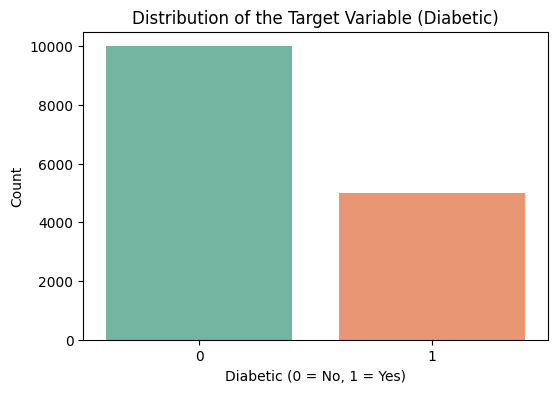

In [13]:

# Check for missing values in the dataset
print("Missing values per column:")
print(data.isnull().sum())  # Displays the count of missing values for each column

# Check for duplicates
print(f"Number of duplicate rows: {data.duplicated().sum()}")  # Counts duplicate rows

# Plot the distribution of the target variable
plt.figure(figsize=(6, 4))
sns.countplot(data=data, x='Diabetic', palette='Set2')  # Visualize the distribution of the target
plt.title("Distribution of the Target Variable (Diabetic)")
plt.xlabel("Diabetic (0 = No, 1 = Yes)")
plt.ylabel("Count")
plt.show()


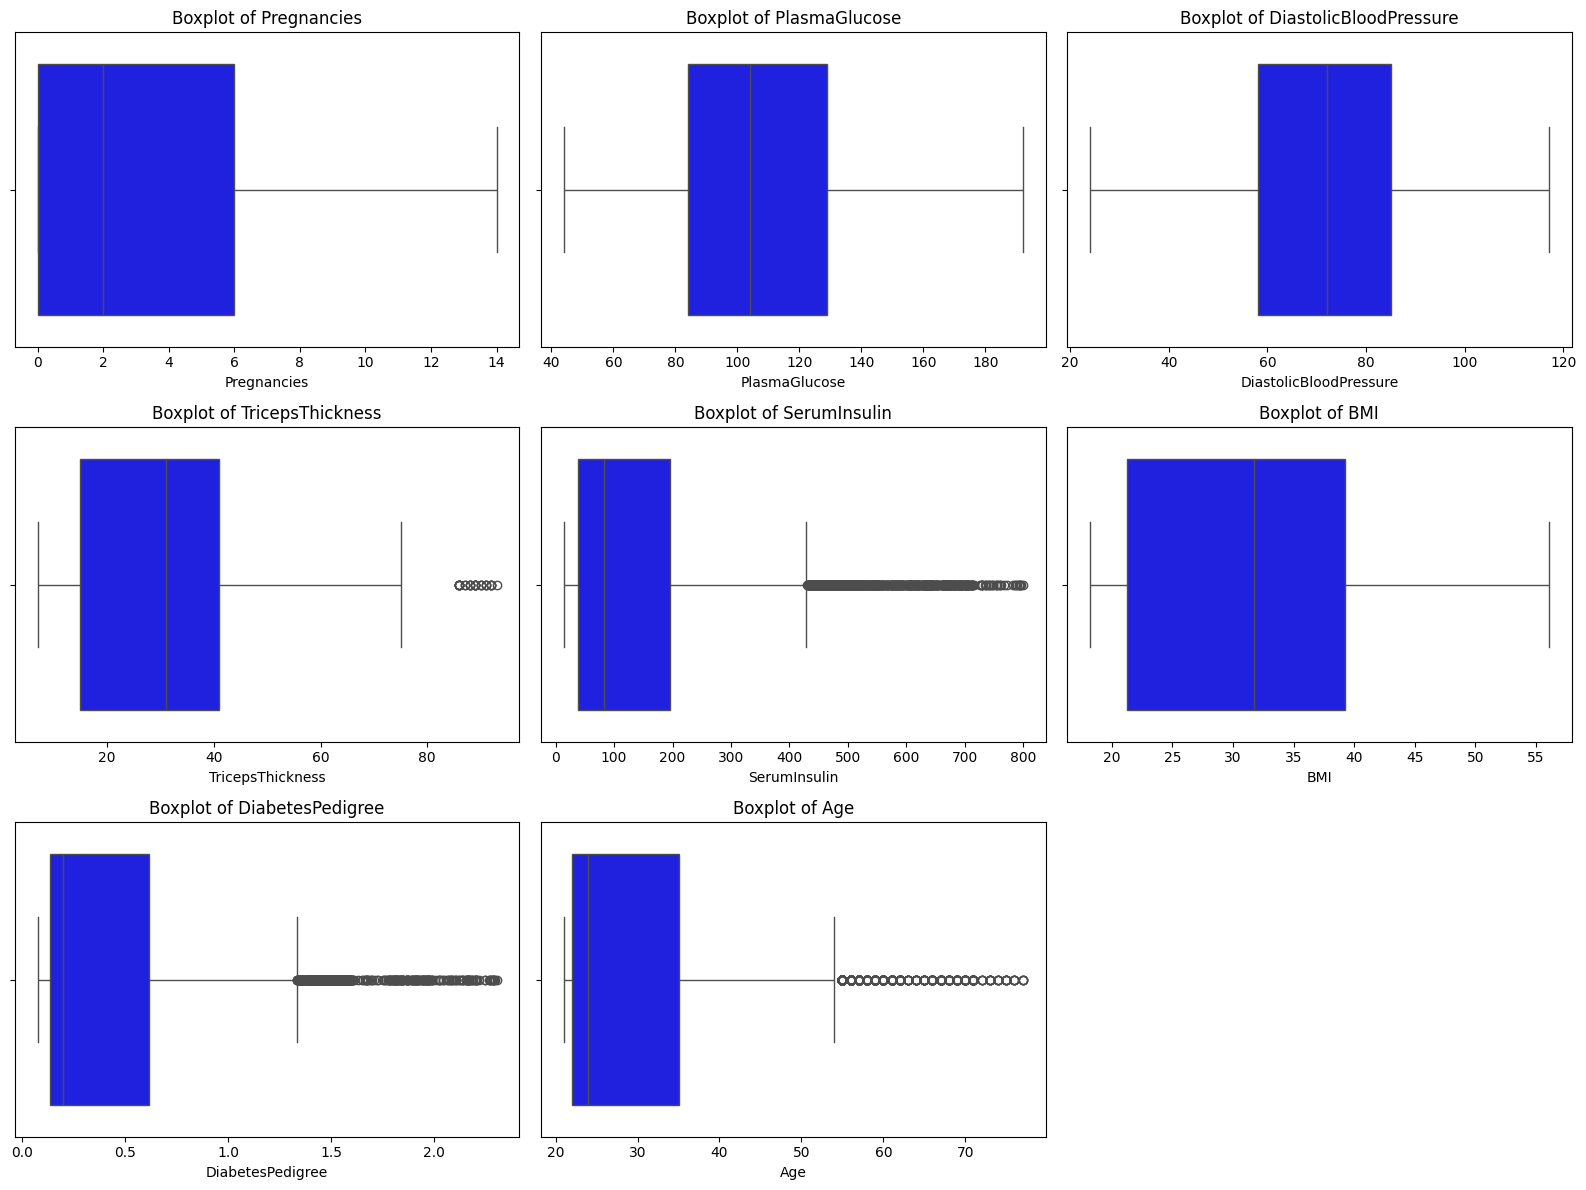

In [14]:
# Plot histograms for numerical features
numerical_features = ['Pregnancies', 'PlasmaGlucose', 'DiastolicBloodPressure', 
                      'TricepsThickness', 'SerumInsulin', 'BMI', 'DiabetesPedigree', 'Age']

plt.figure(figsize=(16, 12))  # Set the figure size

# Loop through each feature to plot
for i, feature in enumerate(numerical_features, 1):
    plt.subplot(3, 3, i)  # Create subplots (3 rows, 3 columns)
    sns.boxplot(data=data,x=feature, color='blue')  # Boxplot for the feature
    plt.title(f"Boxplot of {feature}")
    plt.xlabel(feature)

plt.tight_layout()  # Adjust layout to prevent overlapping
plt.show()


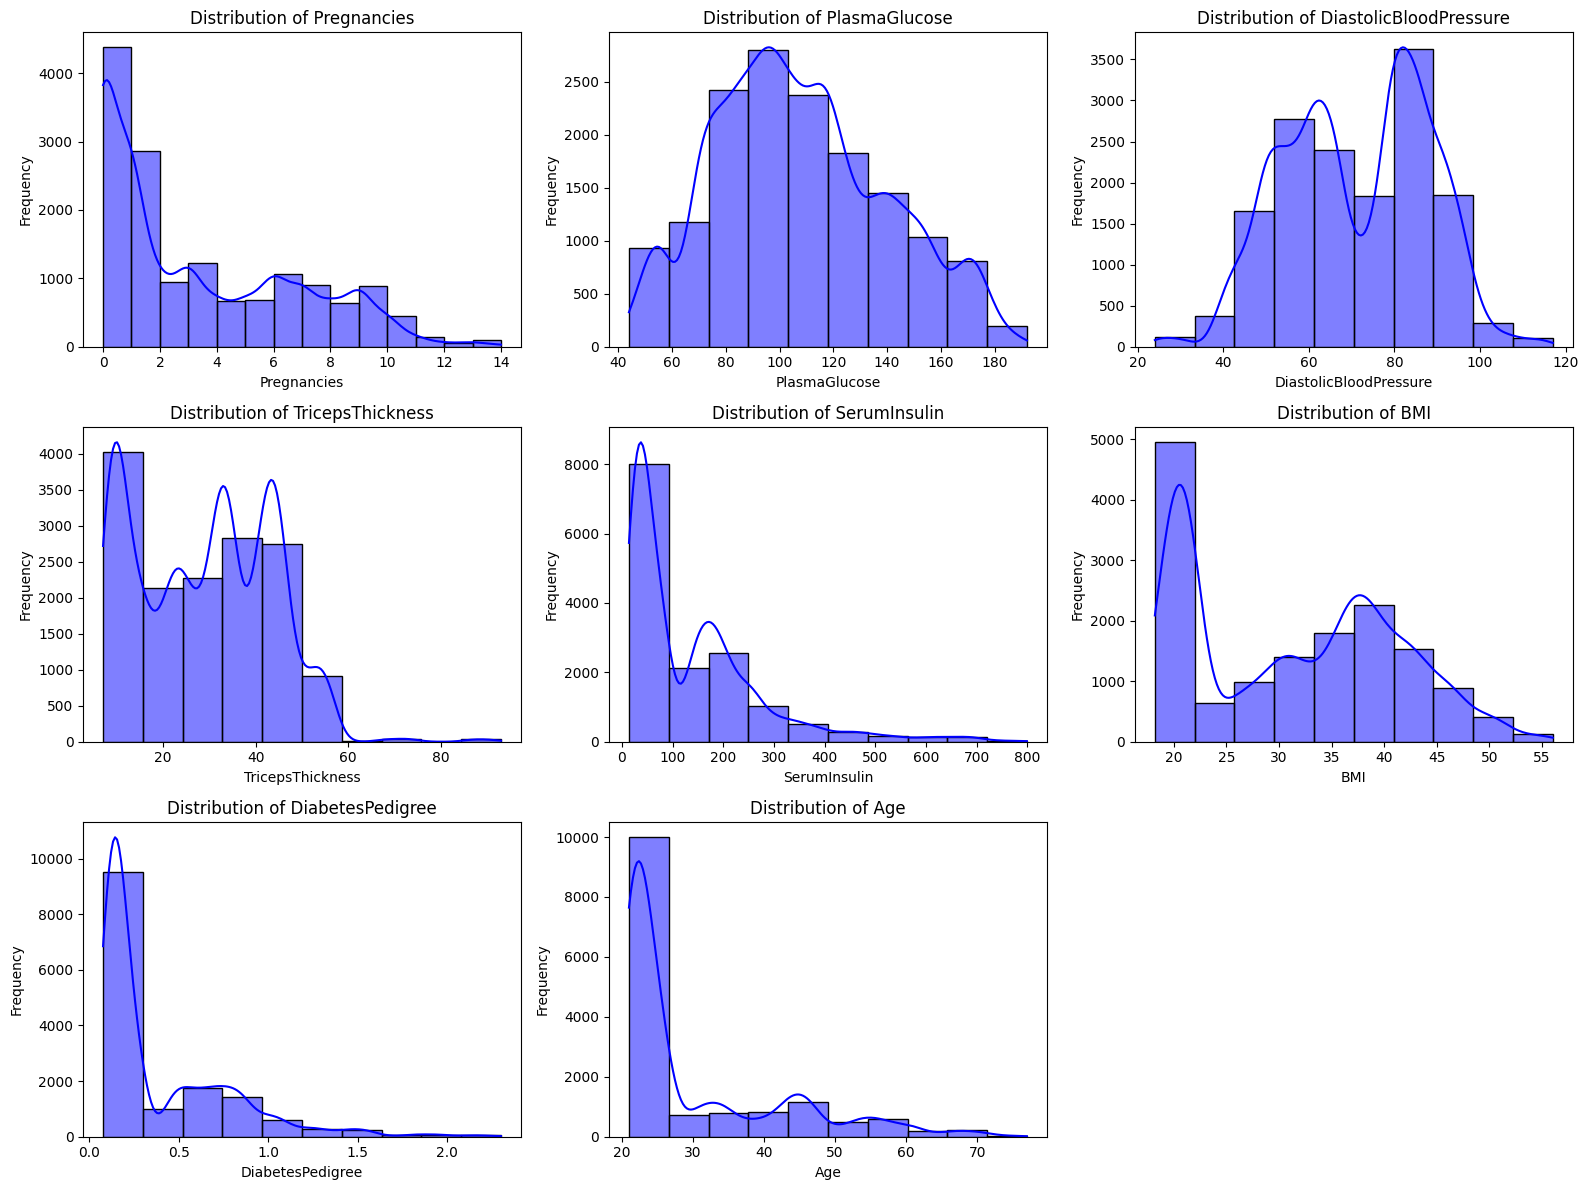

In [15]:
# Plot histograms for numerical features with custom bins
numerical_features = ['Pregnancies', 'PlasmaGlucose', 'DiastolicBloodPressure', 
                      'TricepsThickness', 'SerumInsulin', 'BMI', 'DiabetesPedigree', 'Age']
nb_bin_feature = [14, 10, 10, 10, 10, 10, 10, 10]  # Custom bin sizes for each feature

plt.figure(figsize=(16, 12))  # Set the figure size

# Loop through each feature and its corresponding bin size
for i, (feature, bins) in enumerate(zip(numerical_features, nb_bin_feature), 1):
    plt.subplot(3, 3, i)  # Create subplots (3 rows, 3 columns)
    sns.histplot(data[feature], kde=True, bins=bins, color='blue')  # Use custom bins
    plt.title(f"Distribution of {feature}")
    plt.xlabel(feature)
    plt.ylabel("Frequency")

plt.tight_layout()  # Adjust layout to prevent overlapping
plt.show()


In [17]:
#define x and y
X = data[['Pregnancies', 'PlasmaGlucose', 'DiastolicBloodPressure', 'TricepsThickness', 'SerumInsulin', 'BMI', 'DiabetesPedigree', 'Age']] #feature columns
y = data['Diabetic'] #target column

# Split the dataset into training and testing sets
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state= 42)

#initialise the mogistic regression model
model = LogisticRegression(max_iter=1000)  # Create a Logistic Regression model

#fit the model to the training data

model.fit(X_train,y_train)

#Make predictions on the test data
y_pred = model.predict(X_test)

#evaluate the model
accuracy = accuracy_score(y_test,y_pred)

conf_matrix= confusion_matrix(y_test,y_pred)
class_report=classification_report(y_test,y_pred)

#print the results
print(f"Accuracy: {accuracy}")
print(f"Confusion Matrix:\n{conf_matrix}")
print(f"Classification Report:\n{class_report}")





Accuracy: 0.7893333333333333
Confusion Matrix:
[[1810  204]
 [ 428  558]]
Classification Report:
              precision    recall  f1-score   support

           0       0.81      0.90      0.85      2014
           1       0.73      0.57      0.64       986

    accuracy                           0.79      3000
   macro avg       0.77      0.73      0.74      3000
weighted avg       0.78      0.79      0.78      3000



In [18]:
# create a Random Forest model
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)

# train the model
rf_model.fit(X_train, y_train)

#obtain predictions
y_pred = rf_model.predict(X_test)

# Accuracy
print(f"Accuracy: {accuracy_score(y_test, y_pred)}")

# Confusion Matrix
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

# Classification Report
print("Classification Report:")
print(classification_report(y_test, y_pred))



Accuracy: 0.9333333333333333
Confusion Matrix:
[[1941   73]
 [ 127  859]]
Classification Report:
              precision    recall  f1-score   support

           0       0.94      0.96      0.95      2014
           1       0.92      0.87      0.90       986

    accuracy                           0.93      3000
   macro avg       0.93      0.92      0.92      3000
weighted avg       0.93      0.93      0.93      3000



In [19]:
feature_importances = pd.DataFrame(rf_model.feature_importances_,
                                   index=X.columns,
                                   columns=['Importance']).sort_values(by='Importance', ascending=False)
print(feature_importances)


                        Importance
Pregnancies               0.301797
BMI                       0.181901
Age                       0.159865
SerumInsulin              0.115963
PlasmaGlucose             0.094500
TricepsThickness          0.055022
DiastolicBloodPressure    0.048032
DiabetesPedigree          0.042919


In [21]:
import joblib

# Salva il modello
joblib.dump(rf_model, 'model.pkl')


['model.pkl']

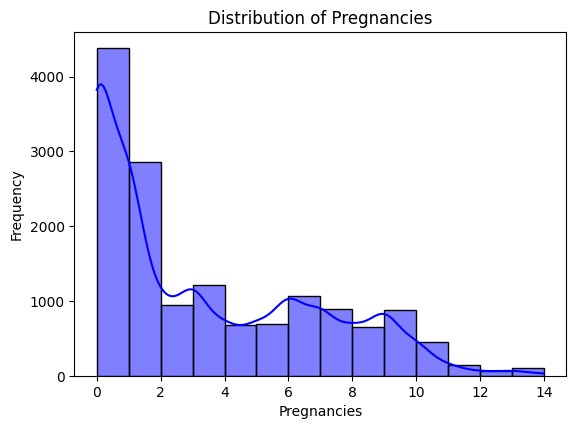

In [14]:
# Plot histograms for numerical features
numerical_features = ['Pregnancies']
plt.figure(figsize=(16, 12))  # Set the figure size

# Loop through each feature to plot
for i, feature in enumerate(numerical_features, 1):
    plt.subplot(3, 3, i)  # Create subplots (3 rows, 3 columns)
    sns.histplot(data[feature], kde=True, bins=14, color='blue')  # Histogram with density curve 
    plt.title(f"Distribution of {feature}")
    plt.xlabel(feature)
    plt.ylabel("Frequency")

plt.tight_layout()  # Adjust layout to prevent overlapping
plt.show()


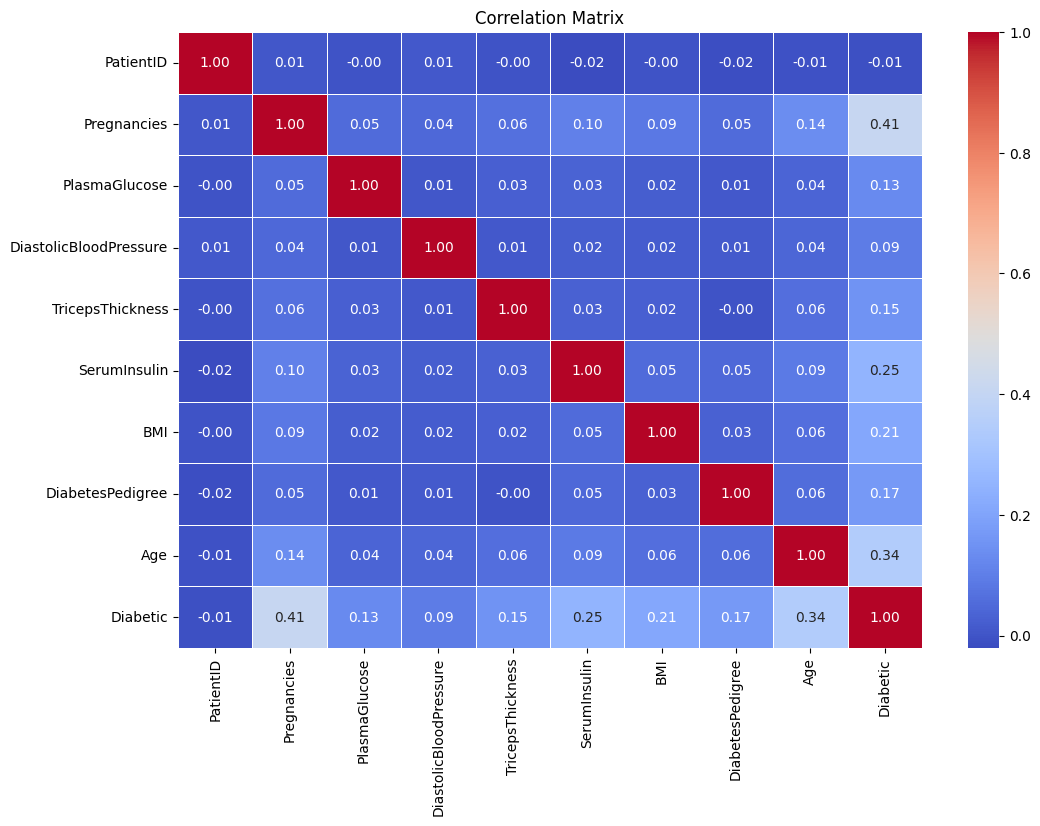

Correlations with Target Variable (Diabetic):
Diabetic                  1.000000
Pregnancies               0.407315
Age                       0.342605
SerumInsulin              0.247375
BMI                       0.210508
DiabetesPedigree          0.170302
TricepsThickness          0.152505
PlasmaGlucose             0.128004
DiastolicBloodPressure    0.091307
PatientID                -0.012494
Name: Diabetic, dtype: float64


In [8]:
# Calculate the correlation matrix
correlation_matrix = data.corr()

# Visualize the correlation matrix as a heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title("Correlation Matrix")
plt.show()

# Sort and display correlations with the target variable
correlations_with_target = correlation_matrix['Diabetic'].sort_values(ascending=False)
print("Correlations with Target Variable (Diabetic):")
print(correlations_with_target)


From the boxplot and histogram analysis, we identified several key issues that need to be addressed to normalize the distributions and facilitate a transition toward a more Gaussian (normal) distribution for certain features:

Skewness in Continuous Features: features such as SerumInsulin, which are continuous variables, exhibit significant skewness. This skewness may disproportionately affect the model's performance. Unlike discrete variables (e.g., Pregnancies, Age) or categorical features, continuous variables with high skewness benefit from transformations. In this case, we will apply a log transformation to reduce skewness and improve the feature's representation.

Presence of Outliers: features such as TricepsThickness, SerumInsulin, and DiabetesPedigree display extreme outliers that could distort the dataset and bias the model. To address this, we will use the Interquartile Range (IQR) method to cap or remove these extreme values.

Multi-Modal Distributions: some features, including DiastolicBloodPressure and TricepsThickness, exhibit multi-modal distributions with multiple peaks. These patterns may indicate the presence of distinct subgroups or potential data inconsistencies. Further investigation is required to determine if these patterns are meaningful or if corrective actions need to be taken.

By addressing these issues, we aim to prepare the dataset for better model performance while preserving the interpretability of the features.

We are now going to use the IQR method in order to handle the outliers, to the following feature: 
SerumInsulin, because it is highly skewed with extreme values, ranging up to 799. 
TricepsThickness due to multiple outliers visible in boxplots, with extreme values beyond the typical physiological range.
DiabetesPedigree to be evaluated, based on whether the other features justify the presence of those outliers or not.

In [9]:
# Define a function for capping outliers using the IQR method
def cap_outliers(column):
    q1 = data[column].quantile(0.25)  # 1st Quartile
    q3 = data[column].quantile(0.75)  # 3rd Quartile
    iqr = q3 - q1  # Interquartile Range
    lower_bound = q1 - 1.5 * iqr
    upper_bound = q3 + 1.5 * iqr
    # Cap values
    data[column] = np.clip(data[column], lower_bound, upper_bound)

# Apply capping to the selected features
columns_to_cap = ['SerumInsulin', 'TricepsThickness','BMI']
for column in columns_to_cap:
    cap_outliers(column)


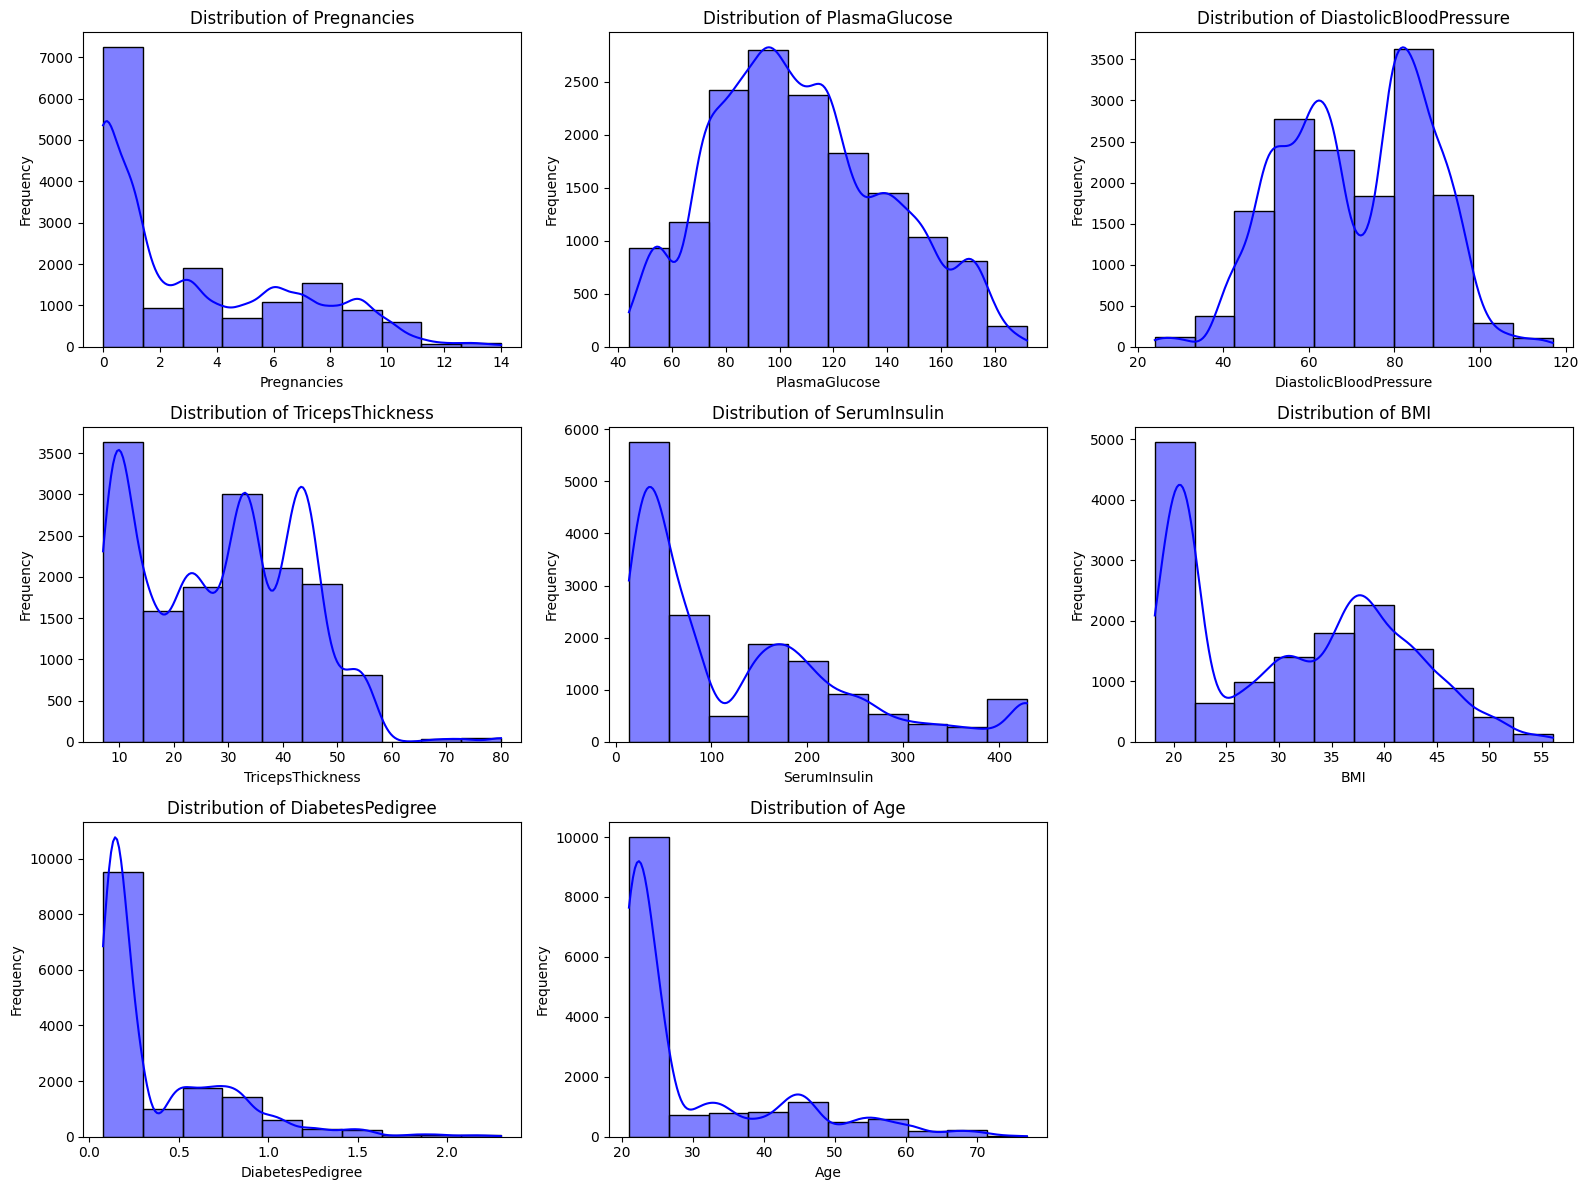

In [10]:
# Plot histograms for numerical features
numerical_features = ['Pregnancies', 'PlasmaGlucose', 'DiastolicBloodPressure', 
                      'TricepsThickness', 'SerumInsulin', 'BMI', 'DiabetesPedigree', 'Age']

plt.figure(figsize=(16, 12))  # Set the figure size

# Loop through each feature to plot
for i, feature in enumerate(numerical_features, 1):
    plt.subplot(3, 3, i)  # Create subplots (3 rows, 3 columns)
    sns.histplot(data[feature], kde=True, bins=10, color='blue')  # Histogram with density curve 
    plt.title(f"Distribution of {feature}")
    plt.xlabel(feature)
    plt.ylabel("Frequency")

plt.tight_layout()  # Adjust layout to prevent overlapping
plt.show()

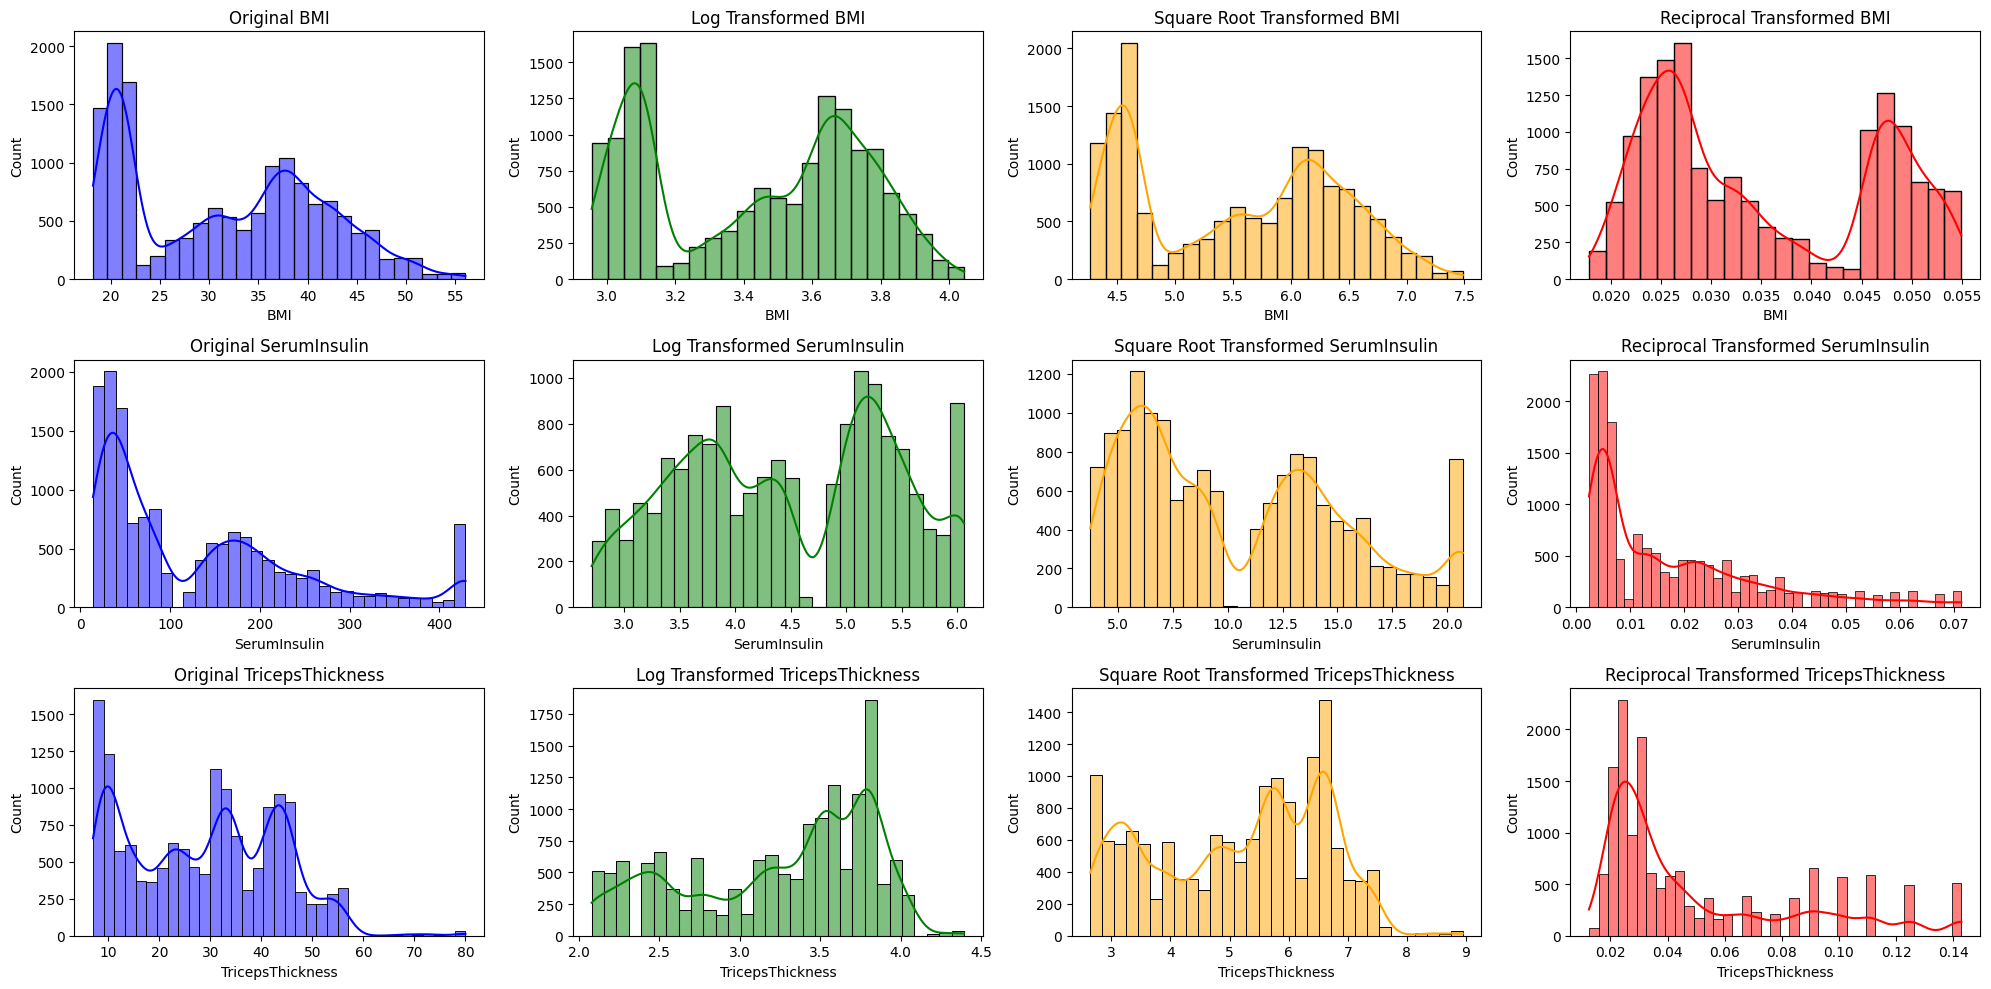

In [11]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# List of features to transform
features_to_transform = ['BMI', 'SerumInsulin', 'TricepsThickness']

# Create subplots for visualization
fig, axes = plt.subplots(len(features_to_transform), 4, figsize=(20, 10))

# Apply transformations and visualize
for i, feature in enumerate(features_to_transform):
    original_data = data[feature]
    log_transformed = np.log1p(original_data)  # Adding 1 to avoid log(0)
    sqrt_transformed = np.sqrt(original_data)
    reciprocal_transformed = 1 / (original_data + 1e-5)  # Adding small constant to avoid division by zero

    # Plot original distribution
    sns.histplot(original_data, kde=True, ax=axes[i, 0], color='blue')
    axes[i, 0].set_title(f'Original {feature}')

    # Plot log-transformed distribution
    sns.histplot(log_transformed, kde=True, ax=axes[i, 1], color='green')
    axes[i, 1].set_title(f'Log Transformed {feature}')

    # Plot sqrt-transformed distribution
    sns.histplot(sqrt_transformed, kde=True, ax=axes[i, 2], color='orange')
    axes[i, 2].set_title(f'Square Root Transformed {feature}')

    # Plot reciprocal-transformed distribution
    sns.histplot(reciprocal_transformed, kde=True, ax=axes[i, 3], color='red')
    axes[i, 3].set_title(f'Reciprocal Transformed {feature}')

plt.tight_layout()
plt.show()


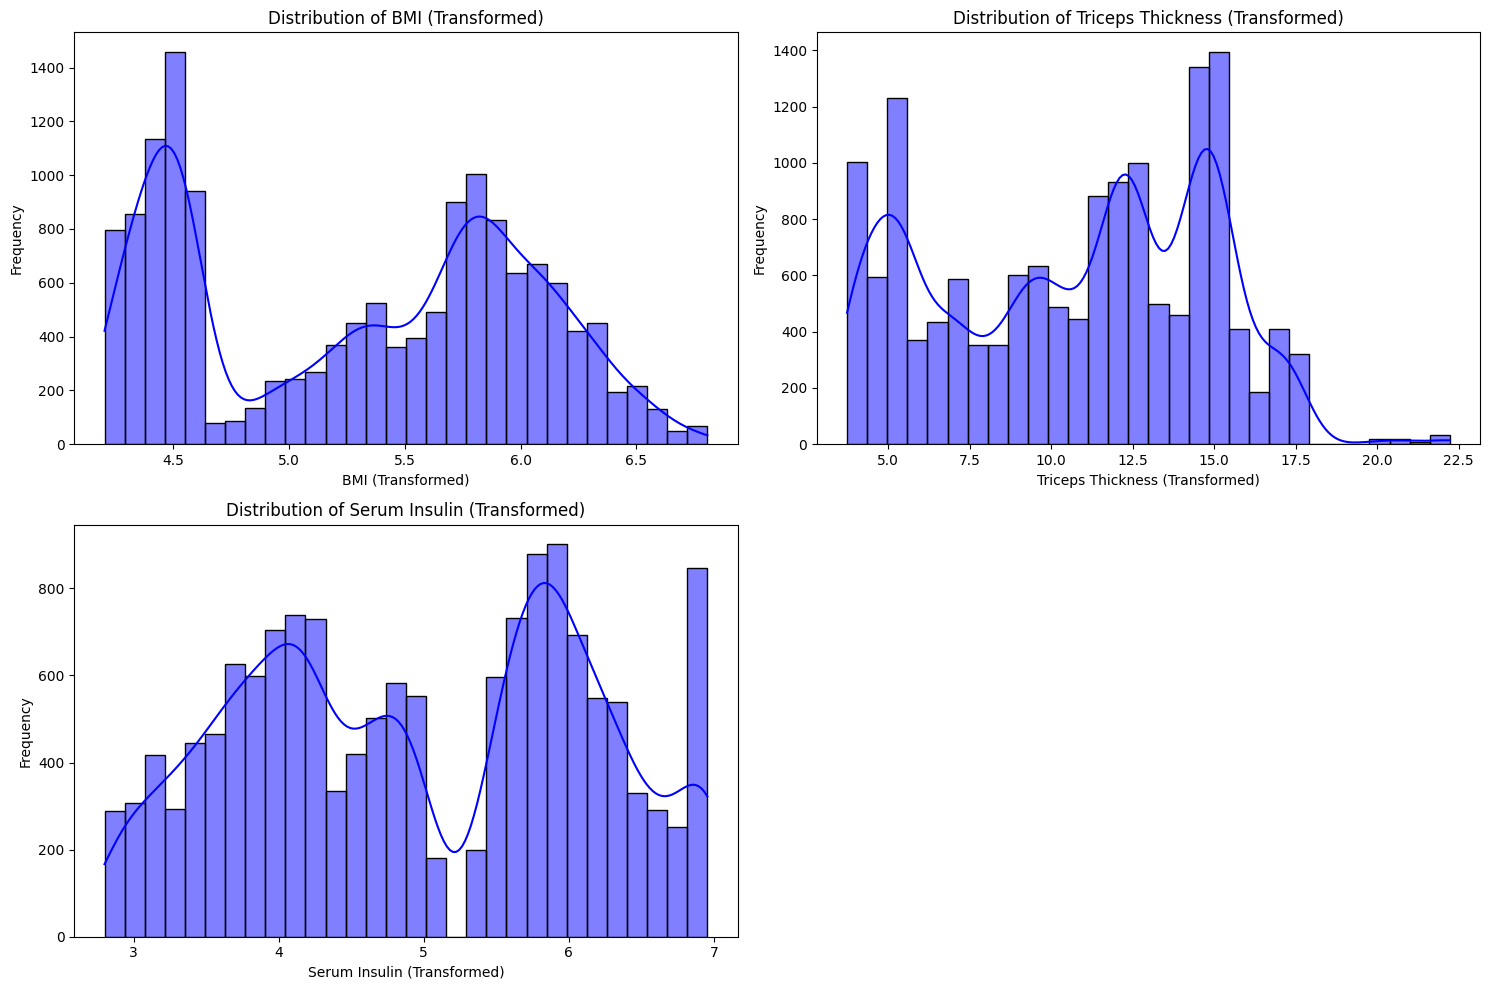

In [12]:
from scipy.stats import boxcox

# Apply Box-Cox Transformation to selected columns
data['BMI_transformed'], _ = boxcox(data['BMI'] + 1e-5)  # A small constant to avoid errors
data['TricepsThickness_transformed'], _ = boxcox(data['TricepsThickness'] + 1e-5)
data['SerumInsulin_transformed'], _ = boxcox(data['SerumInsulin'] + 1e-5)

# Visualize the transformed distributions
import matplotlib.pyplot as plt
import seaborn as sns

# Plot histograms of the transformed features
plt.figure(figsize=(15, 10))

features = ['BMI_transformed', 'TricepsThickness_transformed', 'SerumInsulin_transformed']
titles = ['BMI (Transformed)', 'Triceps Thickness (Transformed)', 'Serum Insulin (Transformed)']

for i, feature in enumerate(features, 1):
    plt.subplot(2, 2, i)
    sns.histplot(data[feature], kde=True, bins=30, color='blue')
    plt.title(f'Distribution of {titles[i-1]}')
    plt.xlabel(titles[i-1])
    plt.ylabel('Frequency')

plt.tight_layout()
plt.show()


In [25]:
# Analyze correlation with other features for DiabetesPedigree
high_pedigree = data[data['DiabetesPedigree'] > 2]
print(high_pedigree[['DiabetesPedigree', 'BMI', 'PlasmaGlucose', 'Diabetic']].describe())

       DiabetesPedigree        BMI  PlasmaGlucose   Diabetic
count         58.000000  58.000000      58.000000  58.000000
mean           2.159268  33.568158     113.000000   0.517241
std            0.083166  10.148544      28.633191   0.504067
min            2.001737  18.230396      63.000000   0.000000
25%            2.092195  24.061827      95.500000   0.000000
50%            2.162480  34.736574     106.500000   1.000000
75%            2.204306  40.145154     130.000000   1.000000
max            2.301594  54.029185     179.000000   1.000000


We decided not to apply capping to the Diabetes Pedigree feature for the following reasons:

Consistency with Other Features:  hgh Diabetes Pedigree values (>2) are accompanied by clinically reasonable BMI (mean: 33.57) and Plasma Glucose (mean: 113). These values align with what we would expect in a population at high genetic risk for diabetes. Moreover the standard deviation for Diabetes Pedigree is low (0.08), suggesting that values above 2 are not extreme outliers but are part of a consistent range.

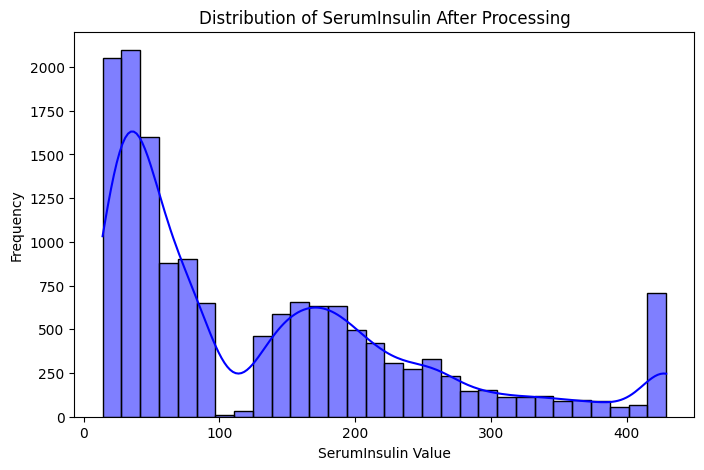

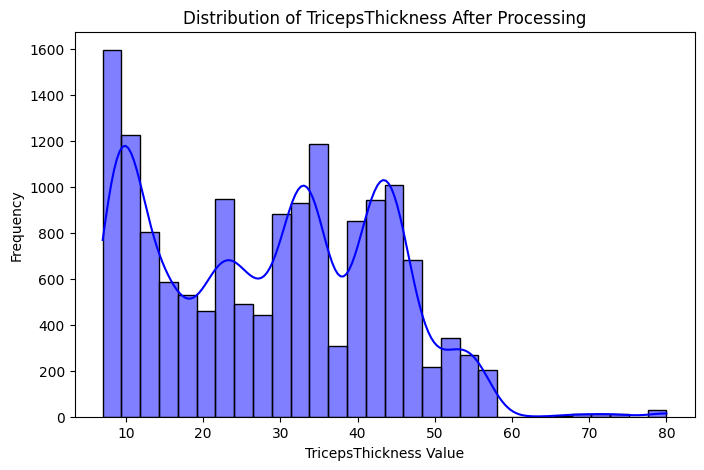

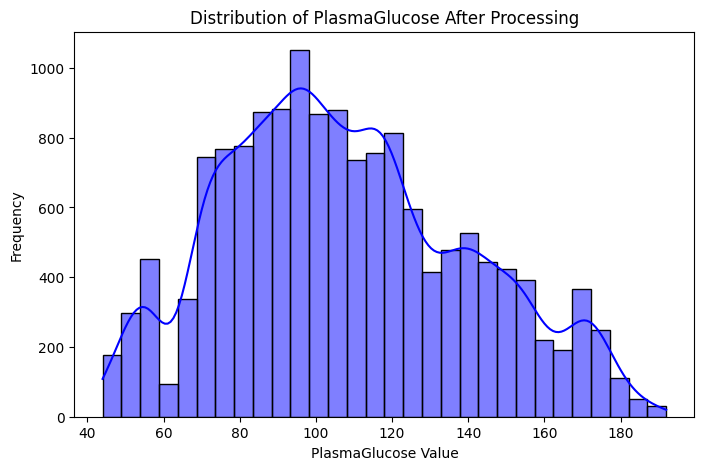

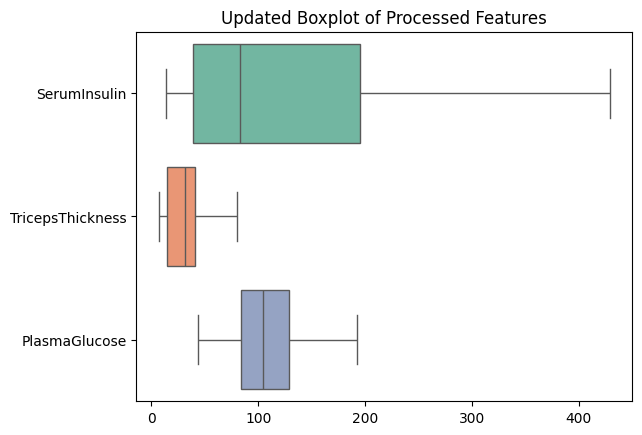

In [26]:
# Histogram for transformed/processed features
transformed_features = ['SerumInsulin', 'TricepsThickness', 'PlasmaGlucose']
for feature in transformed_features:
    plt.figure(figsize=(8, 5))
    sns.histplot(data[feature], kde=True, bins=30, color='blue')
    plt.title(f'Distribution of {feature} After Processing')
    plt.xlabel(f'{feature} Value')
    plt.ylabel('Frequency')
    plt.show()

# Updated boxplot
sns.boxplot(data=data[transformed_features], orient='h', palette="Set2")
plt.title('Updated Boxplot of Processed Features')
plt.show()


We are going to apply log transformation to SerumInsulin feature

In [28]:
# Apply log transformation to SerumInsulin feature
data['SerumInsulin_log'] = np.log1p(data['SerumInsulin'])

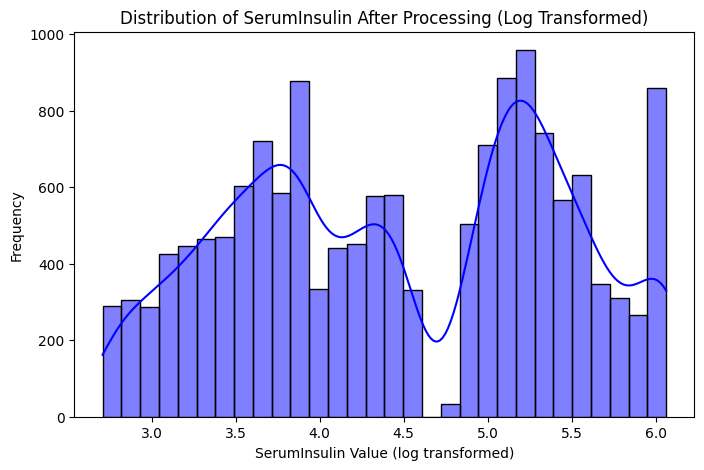

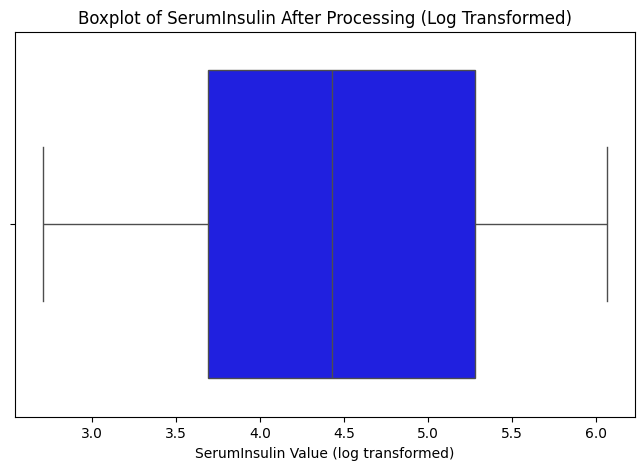

In [32]:
# Histogram for the log-transformed SerumInsulin
plt.figure(figsize=(8, 5))
sns.histplot(data['SerumInsulin_log'], kde=True, bins=30, color='blue')
plt.title('Distribution of SerumInsulin After Processing (Log Transformed)')
plt.xlabel('SerumInsulin Value (log transformed)')
plt.ylabel('Frequency')
plt.show()

# Boxplot for the log-transformed SerumInsulin
plt.figure(figsize=(8, 5))
sns.boxplot(x=data['SerumInsulin_log'], color='blue')
plt.title('Boxplot of SerumInsulin After Processing (Log Transformed)')
plt.xlabel('SerumInsulin Value (log transformed)')
plt.show()


As observed by the plotting above, the capping followed by log transformation has successfully handled the outliers and skewness in the SerumInsulin data.
These steps ensure that the feature is now better suited for use in machine learning models without disproportionately influencing the predictions.

In [34]:
data.drop(columns=['SerumInsulin'], inplace=True)


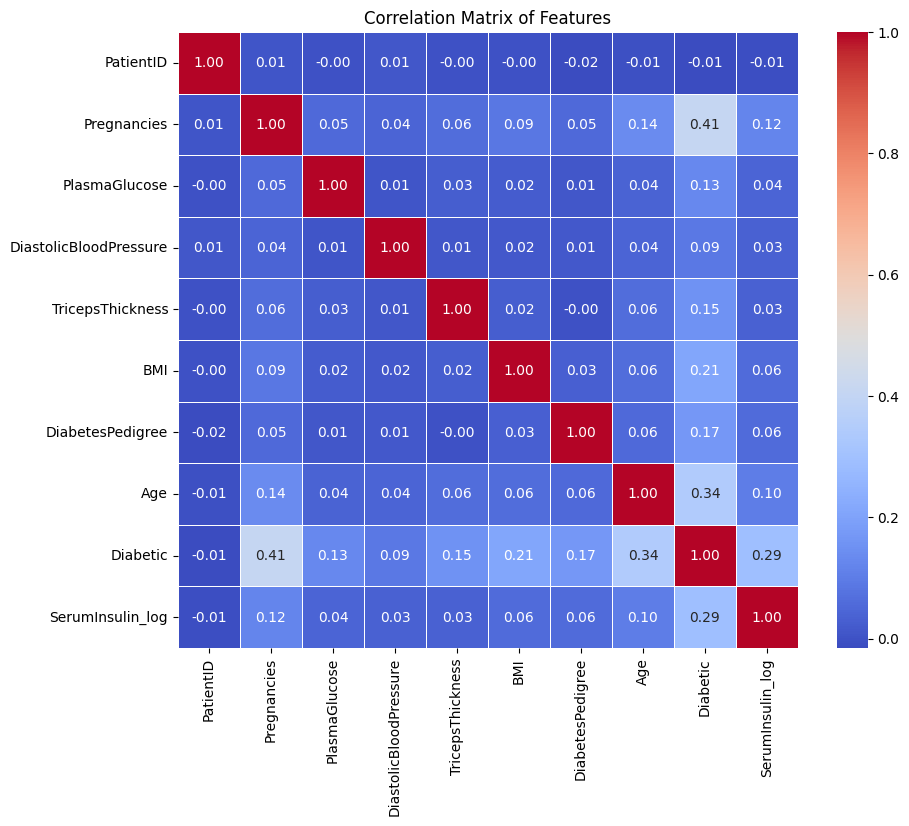

In [35]:
# Correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(data.corr(), annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title('Correlation Matrix of Features')
plt.show()


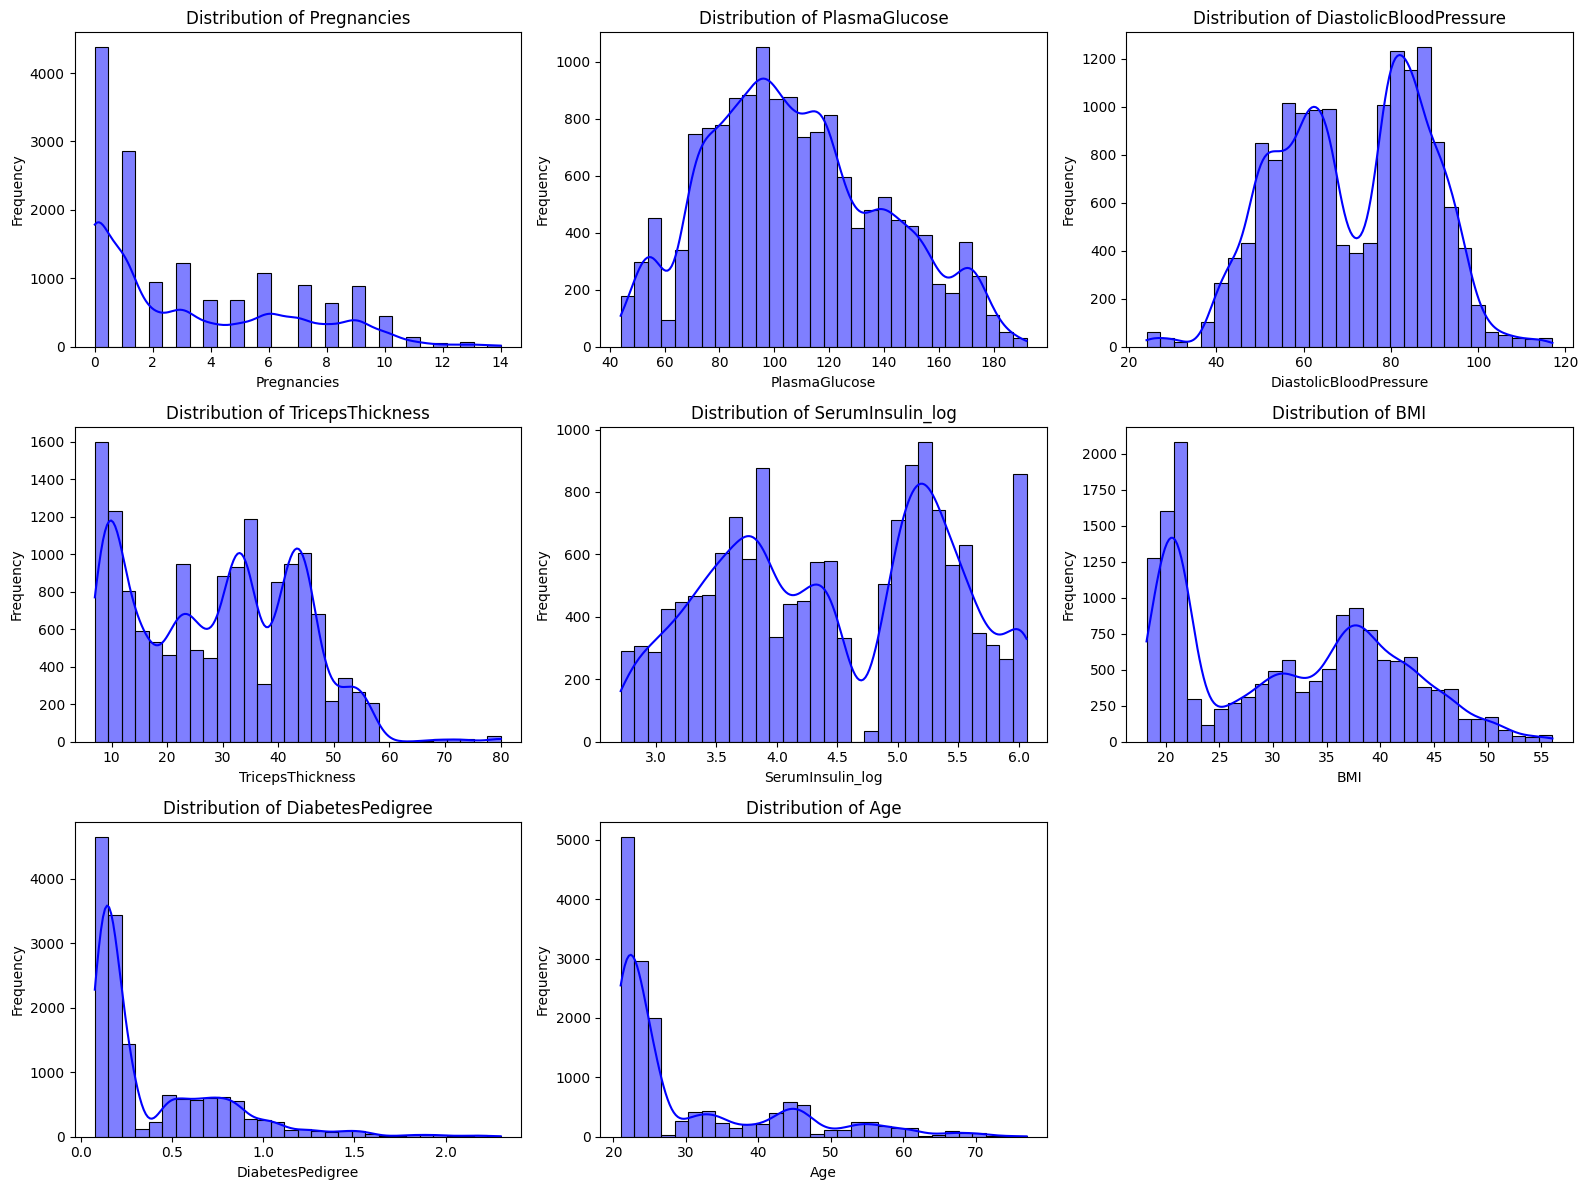

In [37]:
# Plot histograms for numerical features
numerical_features = ['Pregnancies', 'PlasmaGlucose', 'DiastolicBloodPressure', 
                      'TricepsThickness', 'SerumInsulin_log', 'BMI', 'DiabetesPedigree', 'Age']

plt.figure(figsize=(16, 12))  # Set the figure size

# Loop through each feature to plot
for i, feature in enumerate(numerical_features, 1):
    plt.subplot(3, 3, i)  # Create subplots (3 rows, 3 columns)
    sns.histplot(data[feature], kde=True, bins=30, color='blue')  # Histogram with density curve 
    plt.title(f"Distribution of {feature}")
    plt.xlabel(feature)
    plt.ylabel("Frequency")

plt.tight_layout()  # Adjust layout to prevent overlapping
plt.show()


In [38]:
from sklearn.preprocessing import StandardScaler

# Features to scale
features_to_scale = ['Pregnancies', 'PlasmaGlucose', 'DiastolicBloodPressure', 
                     'TricepsThickness', 'SerumInsulin_log', 'BMI', 'DiabetesPedigree', 'Age']

# Initialize the scaler
scaler = StandardScaler()

# Scale the features
data_scaled = data.copy()
data_scaled[features_to_scale] = scaler.fit_transform(data[features_to_scale])


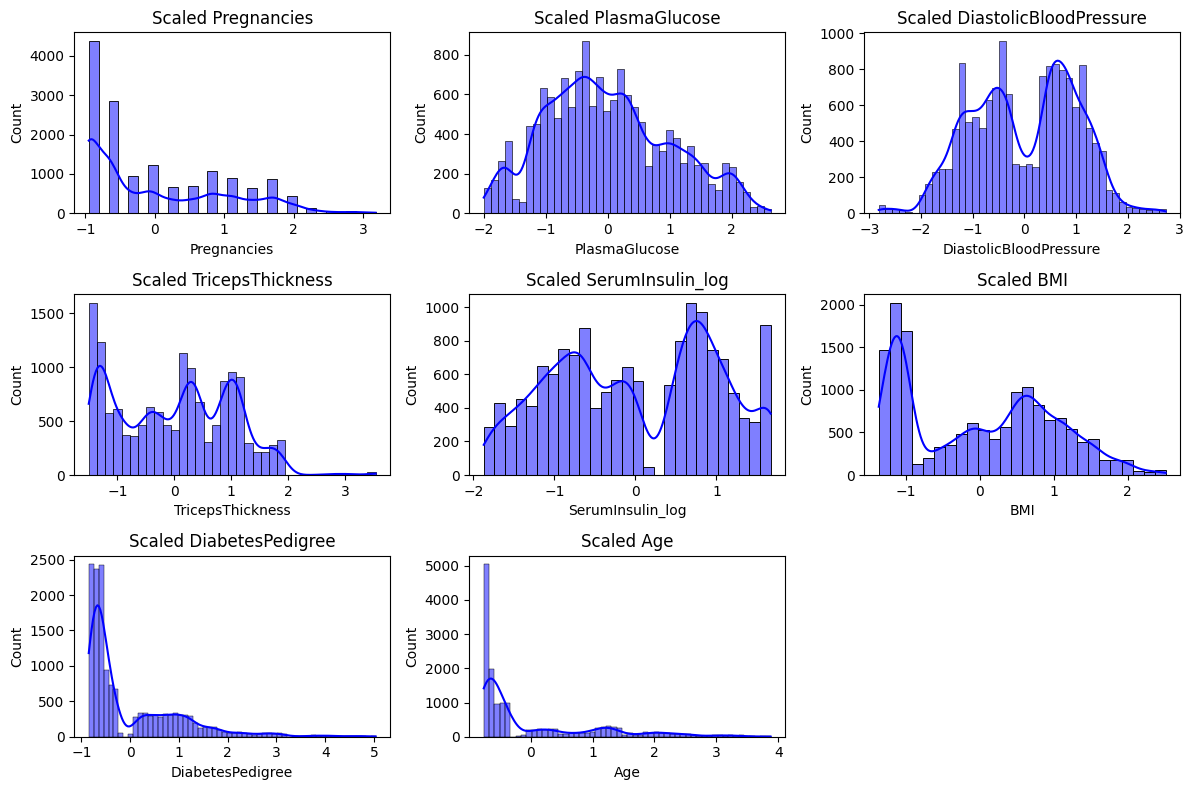

In [39]:
import matplotlib.pyplot as plt
import seaborn as sns

# Visualize scaled data
plt.figure(figsize=(12, 8))
for i, feature in enumerate(features_to_scale, 1):
    plt.subplot(3, 3, i)
    sns.histplot(data_scaled[feature], kde=True, color='blue')
    plt.title(f'Scaled {feature}')
plt.tight_layout()
plt.show()


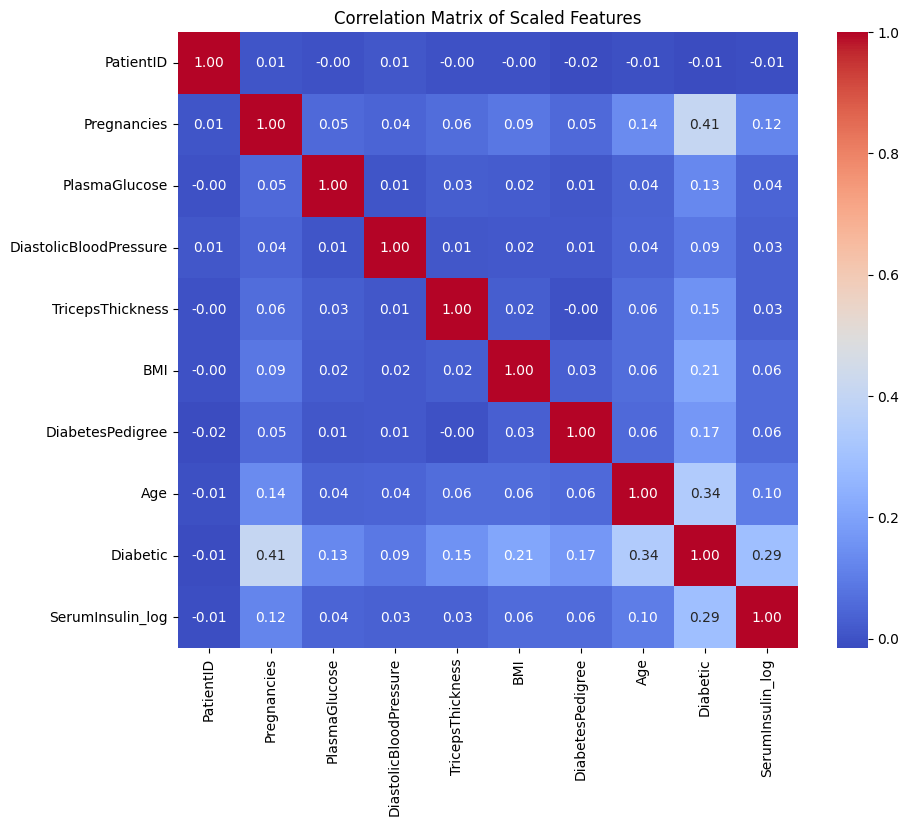

In [40]:
# Recompute and visualize correlation matrix
corr_matrix = data_scaled.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Matrix of Scaled Features")
plt.show()


In [46]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant

# Add constant (required for VIF calculation)
X = add_constant(data[["Pregnancies", "PlasmaGlucose", "DiastolicBloodPressure",
                       "TricepsThickness", "SerumInsulin_log", "BMI",
                       "DiabetesPedigree", "Age"]])

# Calculate VIF for each feature
vif = pd.DataFrame({
    "Feature": X.columns,
    "VIF": [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
})

print(vif)


                  Feature        VIF
0                   const  63.727037
1             Pregnancies   1.044449
2           PlasmaGlucose   1.005634
3  DiastolicBloodPressure   1.004045
4        TricepsThickness   1.008122
5        SerumInsulin_log   1.028816
6                     BMI   1.013168
7        DiabetesPedigree   1.008028
8                     Age   1.035768


The Variance Inflation Factor (VIF) is used to identify multicollinearity among the features in the dataset. Multicollinearity occurs when two or more features are highly correlated, which can negatively impact model performance and interpretability.

In the analysis, the VIF value for the constant is very high (63.72), but this is expected and does not influence the analysis. It can be safely ignored. For all other features, the VIF values range between 1.00 and 1.04, indicating very low multicollinearity.

This suggests that there is no significant multicollinearity among the features. As a result, all features can be retained for model training, as no redundancies were detected.

Next steps involve proceeding with machine learning model development since the features are independent. Adding interaction terms or applying feature selection techniques might enhance model performance further, but based on the VIF analysis, this is not strictly necessary.

In [47]:
from sklearn.model_selection import train_test_split

# Split into features and target
X = data.drop(columns=["Diabetic", "PatientID"])
y = data["Diabetic"]

# Perform train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [48]:
from sklearn.linear_model import LogisticRegression

# Train Logistic Regression model
model = LogisticRegression()
model.fit(X_train, y_train)

# Evaluate the model
y_pred = model.predict(X_test)


c:\Users\marco\Documents\DSTI\ML with python\Project 2\Diabetes_prediction\diabetes_env\Lib\site-packages\sklearn\linear_model\_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


I interpret this error as a warning arising from insufficient feature processing. This indicates that the current state of the dataset, particularly the distribution of features, may not be optimal for the Logistic Regression model to converge effectively. It suggests that I should revisit the previous steps and implement additional measures to balance the distribution of my features, ensuring they are well-scaled and appropriately processed to improve the model's performance.

We need to go back to processing our dataset, in  order to handle data imbalance in the target variable.
We can follow two methodologies to handle data imbalance:
Use SMOTE (Synthetic Minority Oversampling Technique) to oversample the minority class.
Use SMOTEENN (SMOTE combined with Edited Nearest Neighbors) for oversampling and removing noisy data points.

Let's start by implementing SMOTE

What Does SMOTE Do?
Identify Minority Class:

SMOTE detects the minority class in your target variable (y_train in this case) only the training set to prevent data leakage.
For example, in your dataset, if Diabetic = 1 (diabetes) is underrepresented compared to Diabetic = 0, SMOTE will focus on balancing this class.
Generate Synthetic Samples:

Instead of duplicating minority class samples, SMOTE creates synthetic samples by interpolating between existing minority samples.
It selects a random sample from the minority class and finds its k-nearest neighbors.
A new sample is created along the line segment between the original sample and one of its k-nearest neighbors. This helps produce new samples within the same feature space.
Balance the Dataset:

SMOTE keeps the distribution of the dataset balanced by ensuring that the minority and majority classes have the same number of samples in the training data.

Limitations of SMOTE
Noise Amplification:

SMOTE can generate synthetic samples in noisy regions, potentially amplifying noise in the dataset.
This can be mitigated by combining SMOTE with techniques like ENN (Edited Nearest Neighbors), which removes noisy data.
Feature Correlation:

If there are strongly correlated features, SMOTE may not fully account for these correlations while generating synthetic samples.
Outliers:

SMOTE can create synthetic samples near outliers, which may negatively affect model performance. Preprocessing like outlier removal can help.

In [49]:
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split

# Split the data into training and testing sets
X = data.drop(columns=['Diabetic'])  # Drop target variable
y = data['Diabetic']                # Target variable

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

# Apply SMOTE to the training set
smote = SMOTE(random_state=42)
X_train_balanced, y_train_balanced = smote.fit_resample(X_train, y_train)

# Visualize the new class distribution
print("Original class distribution in training data:")
print(y_train.value_counts())
print("\nClass distribution after SMOTE:")
print(y_train_balanced.value_counts())


Original class distribution in training data:
Diabetic
0    7000
1    3500
Name: count, dtype: int64

Class distribution after SMOTE:
Diabetic
1    7000
0    7000
Name: count, dtype: int64


C:\Users\marco\AppData\Local\Temp\ipykernel_16712\1078924940.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=y_train_balanced, palette='Set2')


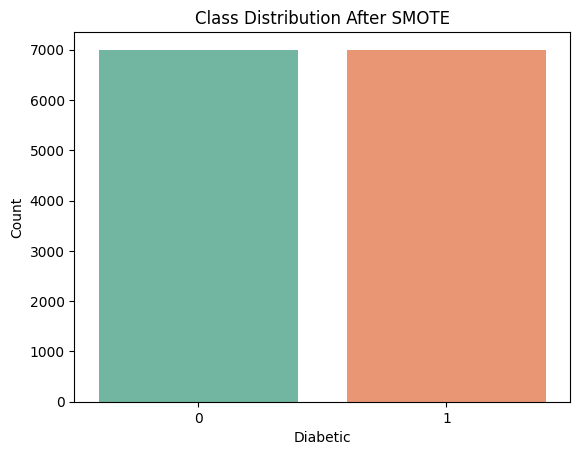

In [50]:
import seaborn as sns
import matplotlib.pyplot as plt

# Plot class distribution
sns.countplot(x=y_train_balanced, palette='Set2')
plt.title('Class Distribution After SMOTE')
plt.xlabel('Diabetic')
plt.ylabel('Count')
plt.show()


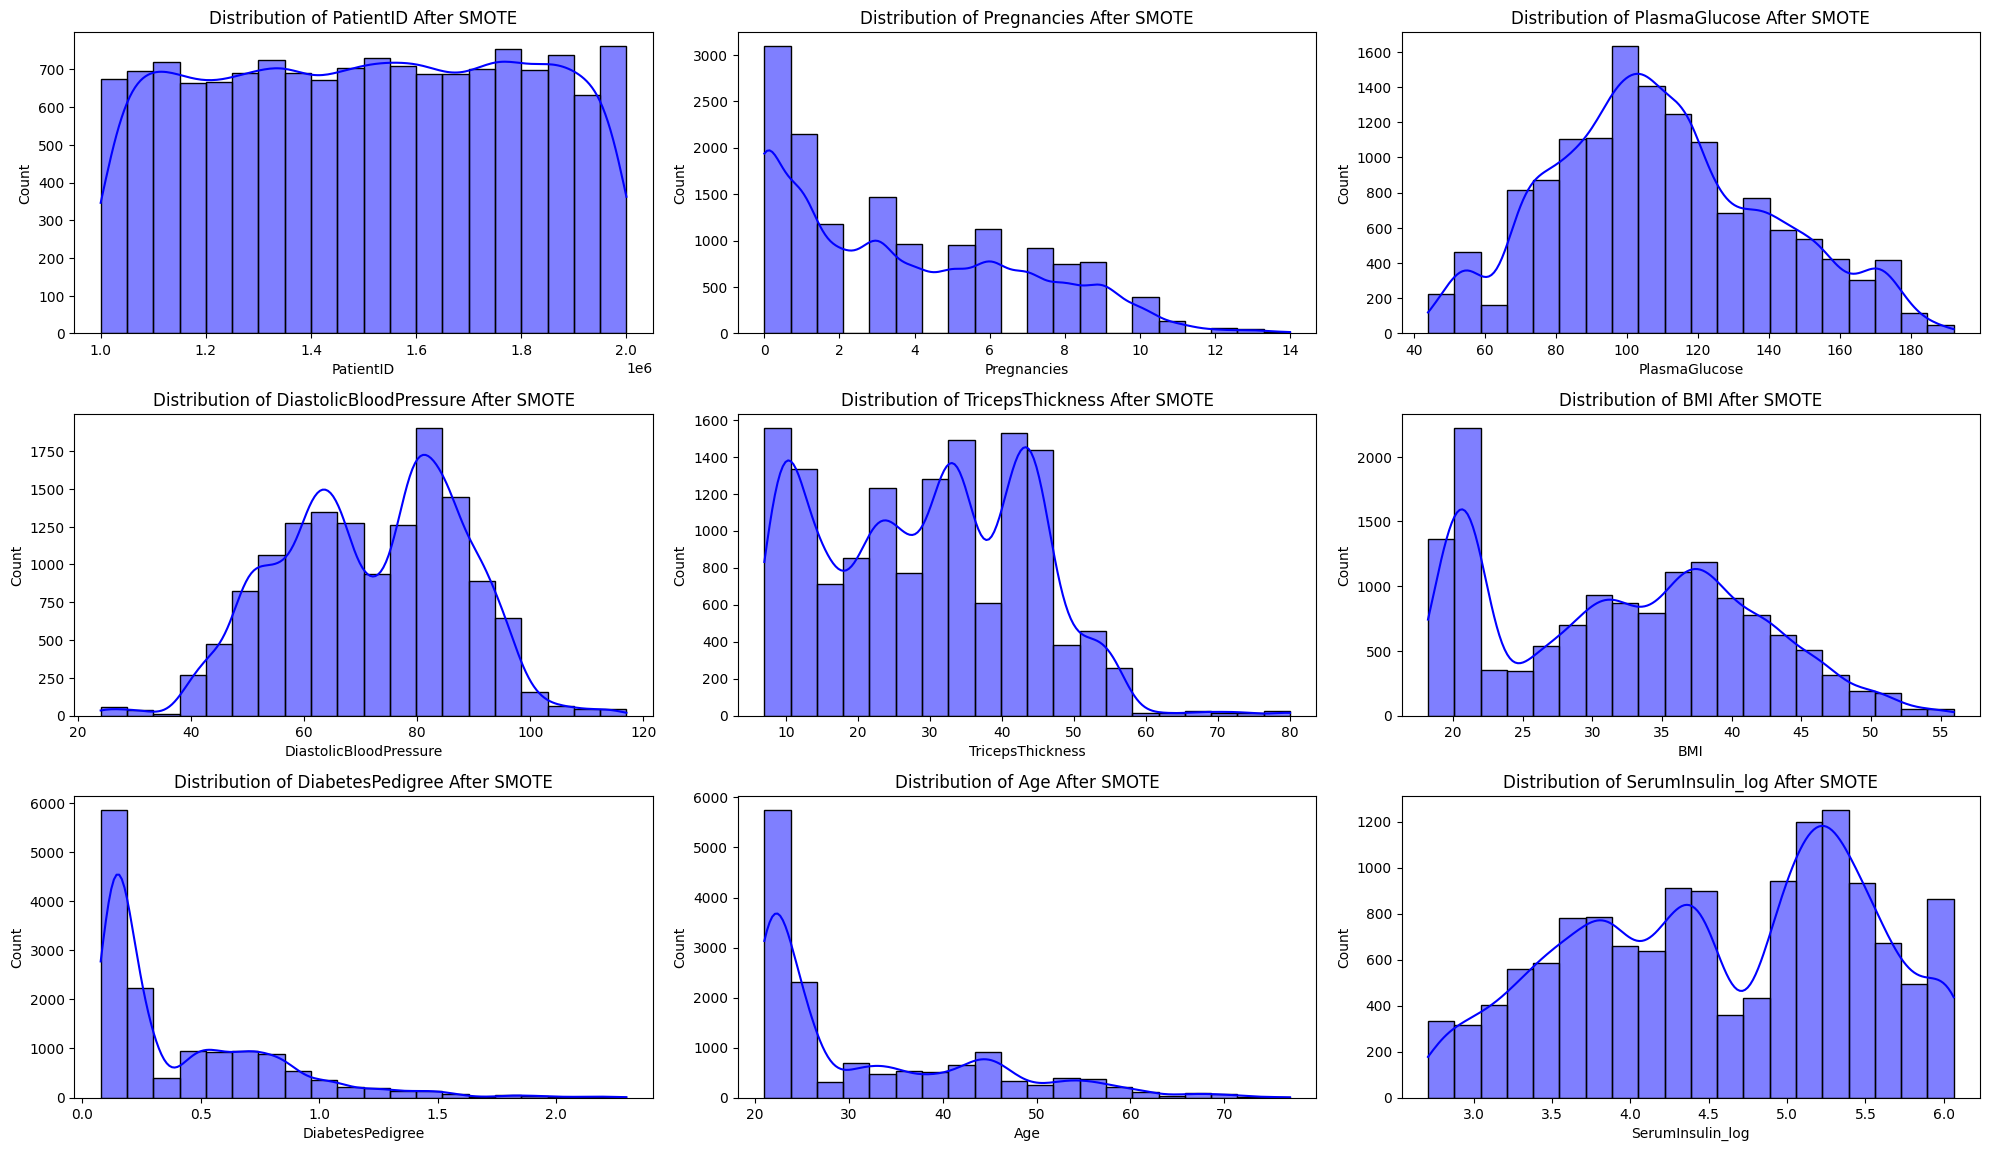

In [51]:
# Visualizzare la distribuzione delle feature dopo SMOTE
plt.figure(figsize=(20, 15))
for i, col in enumerate(X_train_balanced.columns):
    plt.subplot(4, 3, i+1)
    sns.histplot(X_train_balanced[col], kde=True, bins=20, color='blue')
    plt.title(f'Distribution of {col} After SMOTE')
plt.tight_layout()
plt.show()


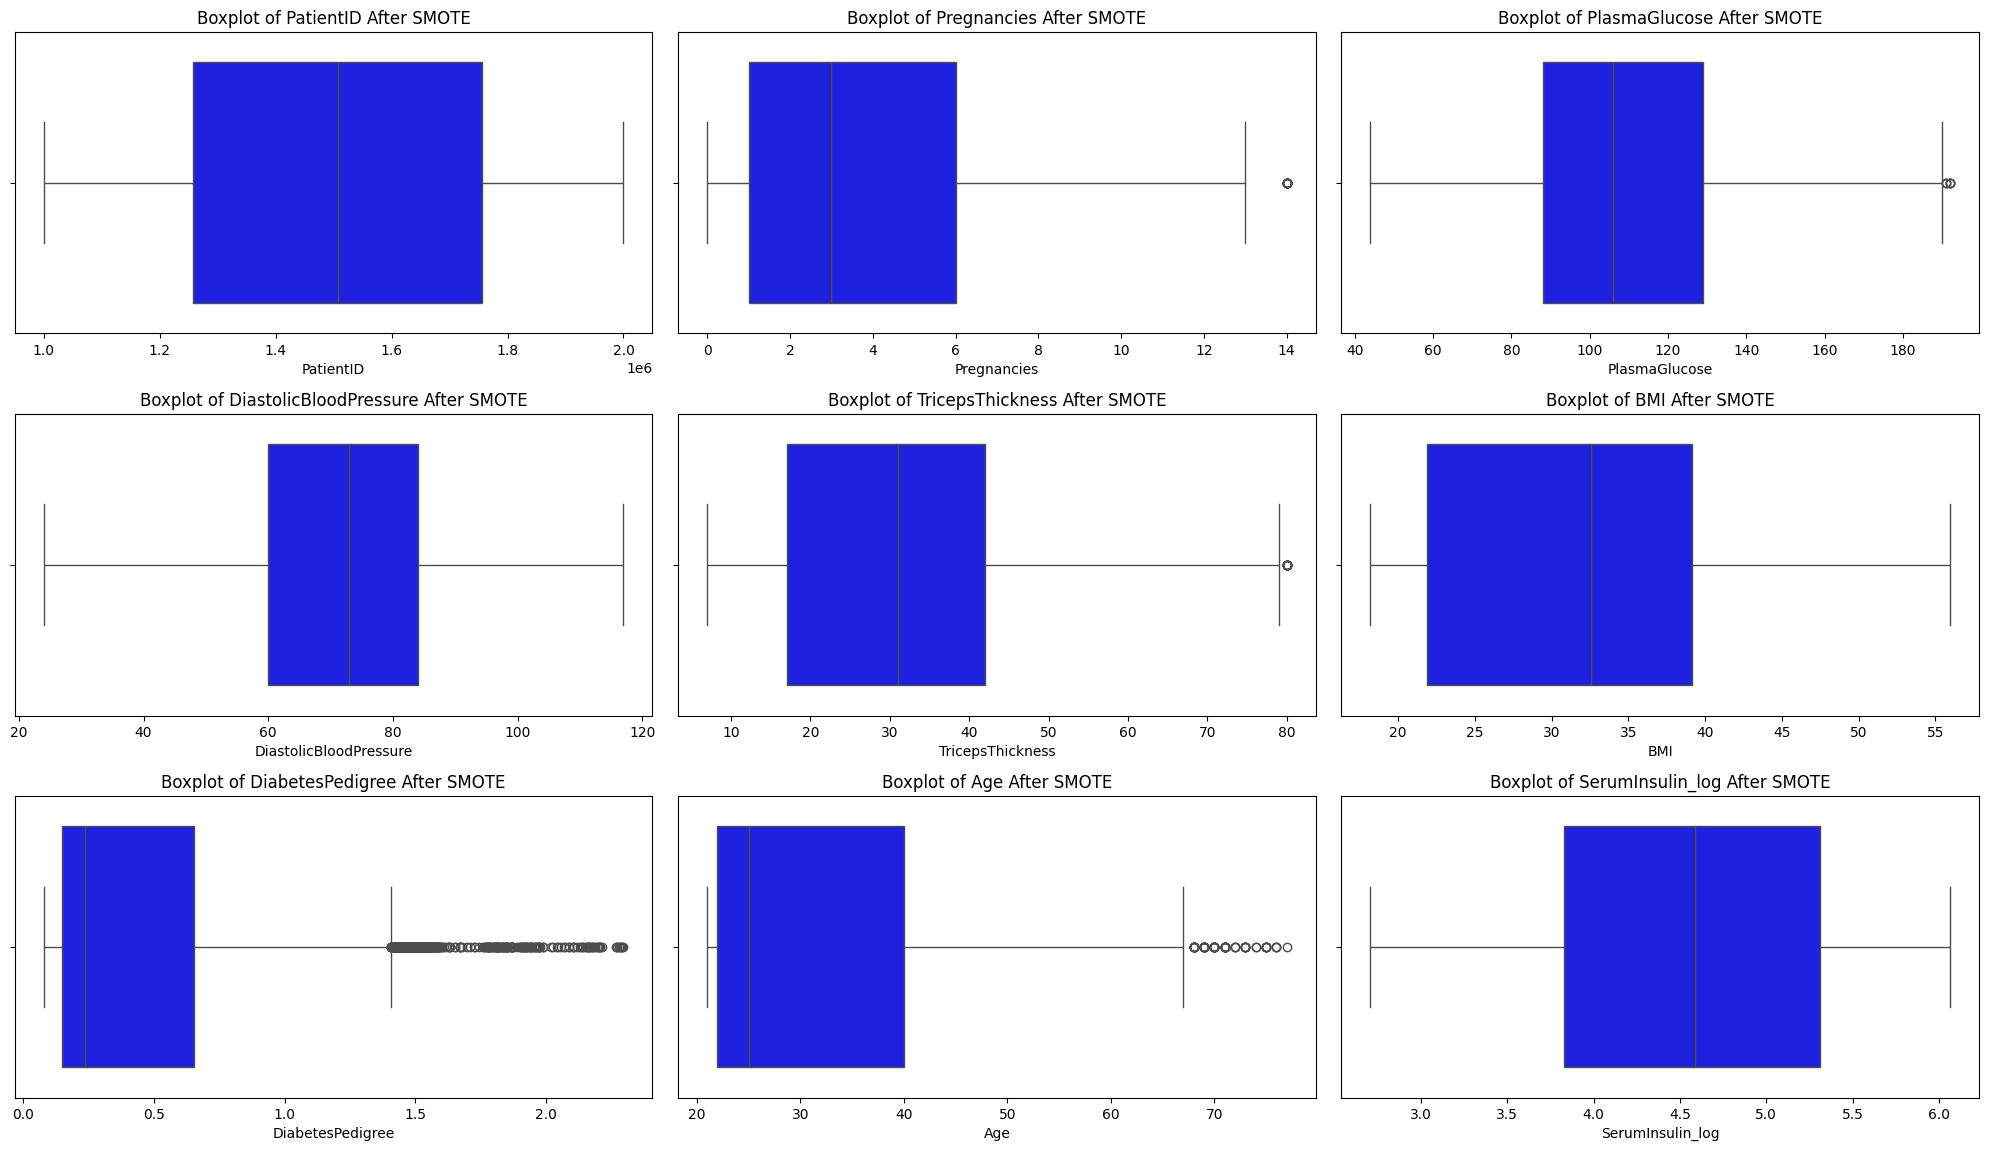

In [52]:
# Visualizzare boxplot delle feature dopo SMOTE
plt.figure(figsize=(20, 15))
for i, col in enumerate(X_train_balanced.columns):
    plt.subplot(4, 3, i+1)
    sns.boxplot(x=X_train_balanced[col], color='blue')
    plt.title(f'Boxplot of {col} After SMOTE')
plt.tight_layout()
plt.show()


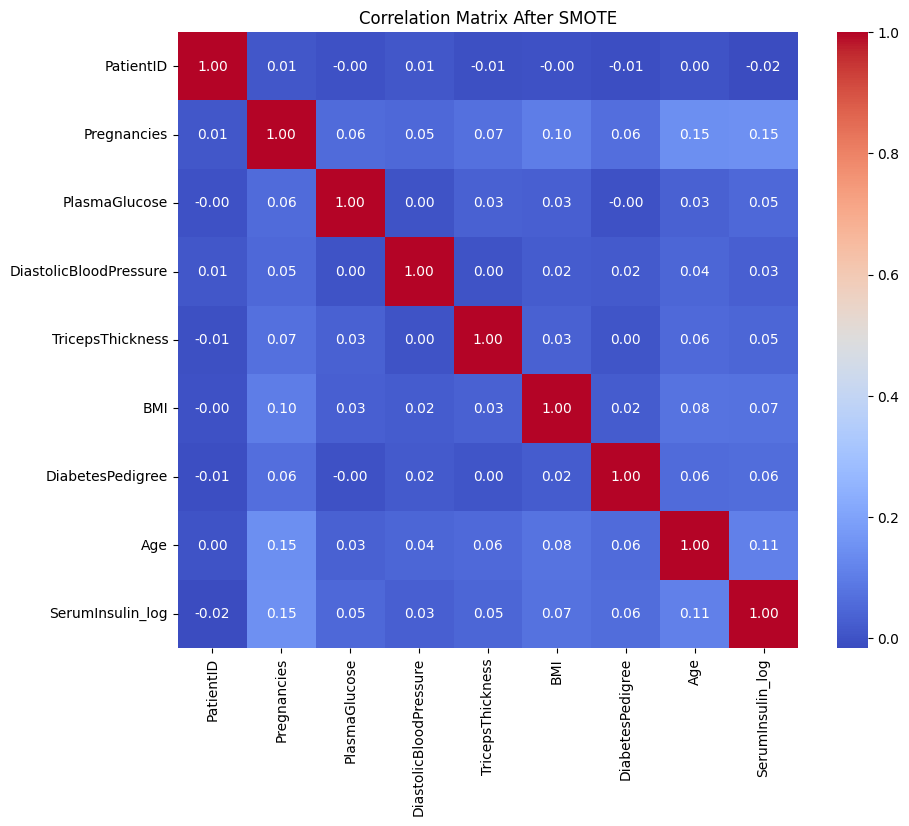

In [53]:
# Matrice di correlazione dopo SMOTE
plt.figure(figsize=(10, 8))
sns.heatmap(X_train_balanced.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix After SMOTE')
plt.show()
